In [1]:
import yt
import trident
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import h5py
from importlib import reload
from astropy.io import fits
import astropy.units as u
import MISTY

from os import listdir

In [2]:
filename = "~/Repo/yt/doc/source/quickstart/IsolatedGalaxy/galaxy0030/galaxy0030"
rfname = "/home/bb/Repo/CGM/plotting_ray/ray.h5"
rfname = "ray0220.h5"

In [3]:
ds = yt.load(filename)

yt : [INFO     ] 2019-05-29 10:00:22,640 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2019-05-29 10:00:22,641 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-05-29 10:00:22,642 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-29 10:00:22,642 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-29 10:00:22,643 Parameters: cosmological_simulation   = 0.0


In [4]:
tri_ray = yt.load(rfname)
hdu =MISTY.write_header(tri_ray, lines=['H I', 'C IV', 'O VI'],
                  impact=0,
                  angle=0)

yt : [INFO     ] 2019-05-29 10:00:22,841 Parameters: current_time              = 1120.0000898117 code_time
yt : [INFO     ] 2019-05-29 10:00:22,841 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2019-05-29 10:00:22,842 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2019-05-29 10:00:22,843 Parameters: domain_right_edge         = [1. 1. 1.] code_length
yt : [INFO     ] 2019-05-29 10:00:22,845 Parameters: cosmological_simulation   = 0.0


In [5]:
nhdu = MISTY.write_parameter_file(ds, hdulist=hdu)

---> SIM_CODE set to  None if you don't like this, change it!
---> ASSUMING PLEIADES FOR NOW BUT SHOULD BE PASSED IN


In [6]:
hdu.info()

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      60   ()      
  1                1 BinTableHDU     14   402R x 2C   ['50A', '50A']   


In [7]:
reload(MISTY)

<module 'MISTY' from '/home/bb/Repo/CGM/misty_fog_spectacle/MISTY.py'>

In [8]:
sg = MISTY.generate_line(tri_ray, 'H I', write=True, use_spectacle=False, hdulist=hdu)

H I [Ly a, Ly b, Ly c, Ly d, Ly e, Ly 6, Ly 7, Ly 8, Ly 9, Ly 10, Ly 11, Ly 12, Ly 13, Ly 14, Ly 15, Ly 16, Ly 17, Ly 18, Ly 19, Ly 20, Ly 21, Ly 22, Ly 23, Ly 24, Ly 25, Ly 26, Ly 27, Ly 28, Ly 29, Ly 30, Ly 31, Ly 32, Ly 33, Ly 34, Ly 35, Ly 36, Ly 37, Ly 38, Ly 39]


yt : [INFO     ] 2019-05-29 10:00:23,098 Allocating for 2.750e+02 particles (index particle type 'all')
yt : [INFO     ] 2019-05-29 10:00:23,103 Identified 1.770e+02 octs
yt : [INFO     ] 2019-05-29 10:00:23,376 Setting instrument to Custom
yt : [INFO     ] 2019-05-29 10:00:23,381 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 275/275 [00:00<00:00, 310.44it/s]
yt : [INFO     ] 2019-05-29 10:00:24,309 Not adding continuum Ly C: insufficient column density or out of range


[name = 'redshift'; format = 'E'
 name = 'wavelength'; format = 'E'; unit = 'Angstrom'
 name = 'tau'; format = 'E' name = 'flux'; format = 'E'
 name = 'sim_column_density'; format = 'E'
 name = 'sim_tau_ray'; format = 'E' name = 'sim_EW'; format = 'E'
 name = 'sim_delta_lambda'; format = 'E'
 name = 'sim_lambda_obs'; format = 'E'
 name = 'sim_thermal_b'; format = 'E'
 name = 'sim_thermal_width'; format = 'E']
----->>>>using  H I 1216 as LINENAME, whereas  H I  was passed. Change?
f =  0.416


In [9]:
hdu.info()

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      60   ()      
  1                1 BinTableHDU     14   402R x 2C   ['50A', '50A']   
  2  H I 1216      1 BinTableHDU     40   1486R x 11C   ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']   


yt : [INFO     ] 2019-05-29 10:00:24,455 Writing spectrum plot to png file: spectrum.png


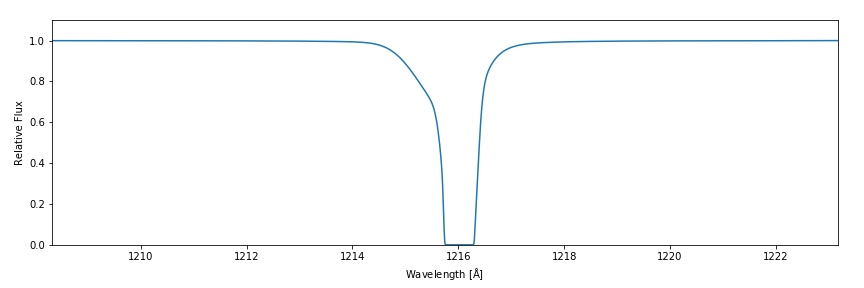

In [10]:
sg.plot_spectrum()
Image('spectrum.png')

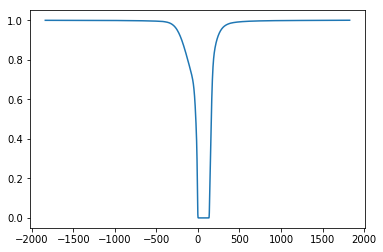

In [11]:
dd = tri_ray.all_data()
rs = [dd['x'][0],dd['y'][0],dd['z'][0] ]
re = [dd['x'][-1],dd['y'][-1],dd['z'][-1] ]
lam0=1216
rayray = ds.ray(rs, re)

rshift = sg.lambda_field.value/lam0 -1

"""plt.plot(sg.lambda_field.value, rshift)
plt.vlines(1216, .005, -.005)
plt.hlines(0, 1209, 1223)
plt.show()"""

z =np.median(rshift)

lam0 = lam0
lams = sg.lambda_field.value *u.Unit('Angstrom')
dequiv = u.equivalencies.doppler_relativistic(lam0*u.Unit('Angstrom')*(z+1))

vel = lams.to('km/s', equivalencies=dequiv)
plt.plot(vel, sg.flux_field)

In [12]:
z

-0.0002071218858949453

In [13]:
lam0 *u.Unit('Angstrom')*1/np.median(lams)-1

<Quantity 0.00020716>

In [14]:
tri_ray.all_data()['redshift_eff']

YTArray([-2.56852016e-04, -2.57923614e-04, -2.58931862e-04,
         -2.59989597e-04, -2.60987072e-04, -2.62025893e-04,
         -2.63007349e-04, -2.64034655e-04, -2.64997173e-04,
         -2.66002207e-04, -2.66946603e-04, -2.67927364e-04,
         -2.68851292e-04, -2.69812052e-04, -2.70706167e-04,
         -2.71640946e-04, -2.72512168e-04, -2.73413434e-04,
         -2.74252704e-04, -2.75120008e-04, -2.75920581e-04,
         -2.76758003e-04, -2.77528704e-04, -2.78319031e-04,
         -2.79063995e-04, -2.79800840e-04, -2.80513263e-04,
         -2.81211970e-04, -2.81862788e-04, -2.82518993e-04,
         -2.83104577e-04, -2.83703394e-04, -2.84232420e-04,
         -2.84764162e-04, -2.85238431e-04, -2.85696716e-04,
         -2.86083105e-04, -2.86532581e-04, -2.86961322e-04,
         -2.86400908e-04, -2.72910889e-04, -1.75263945e-04,
         -8.51929945e-05, -9.56852654e-05, -1.04210838e-04,
         -9.43758586e-05, -8.74329384e-05, -8.76044621e-05,
         -8.76946120e-05, -8.03507835e-0

In [15]:
r2name="ray0200.h5"
ray2 = yt.load(r2name)


yt : [INFO     ] 2019-05-29 10:00:26,291 Parameters: current_time              = 1120.0000898117 code_time
yt : [INFO     ] 2019-05-29 10:00:26,292 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2019-05-29 10:00:26,293 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2019-05-29 10:00:26,294 Parameters: domain_right_edge         = [1. 1. 1.] code_length
yt : [INFO     ] 2019-05-29 10:00:26,294 Parameters: cosmological_simulation   = 0.0


In [16]:
max(ray2.all_data()['redshift_eff'])

yt : [INFO     ] 2019-05-29 10:00:26,870 Allocating for 2.700e+02 particles (index particle type 'all')
yt : [INFO     ] 2019-05-29 10:00:26,874 Identified 1.770e+02 octs


0.0004448329893160796 dimensionless

(array([41.,  0.,  0.,  2.,  1., 31., 22., 12.,  9., 33., 51.,  5.,  3.,
         2.,  2., 27., 21.,  9.,  2.,  2.]),
 YTArray([-2.86961322e-04, -2.51837476e-04, -2.16713630e-04,
          -1.81589784e-04, -1.46465938e-04, -1.11342093e-04,
          -7.62182467e-05, -4.10944009e-05, -5.97055501e-06,
           2.91532908e-05,  6.42771367e-05,  9.94009825e-05,
           1.34524828e-04,  1.69648674e-04,  2.04772520e-04,
           2.39896366e-04,  2.75020212e-04,  3.10144058e-04,
           3.45267903e-04,  3.80391749e-04,  4.15515595e-04]) dimensionless,
 <a list of 20 Patch objects>)

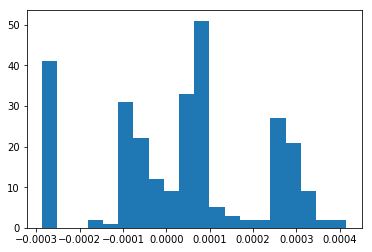

In [19]:
plt.hist(tri_ray.all_data()['redshift_eff'], bins=20)